# SET Characterization based on Pulse Height and Full Width Half Max (FWHM)
In this code, I attempt to characterize SETs

In [1]:
## Needed Libraries and Clear Vars
%reset -f
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## Reading IRES Data

In [2]:
# df_IRES = pd.read_excel('IRES.xlsx', engine='openpyxl')
# # Drops duplicate rows from IRES
# df_IRES.drop_duplicates(keep='first',inplace=True)
# # Can use max, min, time b/t max and min, etc for features
# mean_freq = df_IRES.loc[[0]]
# mean_freq = mean_freq.to_numpy()
# mean = df_IRES.loc[[3]]
# std = df_IRES.loc[[6]]
# var = df_IRES.loc[[9]]
# kur = df_IRES.loc[[12]]


## Importing and Manipulating Data from Simulation/Experiment

In [1]:
# Reads excel sheet
df = pd.read_excel('SET_scatter_data.xlsx',engine='openpyxl')

# Drop columns with unnamed in it
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.sort_values(by=['Class'], inplace=True)


from sklearn import preprocessing
# # Label Encoder is used to encode classes (strings) into values between 0 and 
# # n_classes - 1
le = preprocessing.LabelEncoder()
le.fit(df["Class"])
df["Class"] = le.transform(df["Class"])


# Coorelation Matrix - What values have good coorelation with class value
coorelation_matrix = df.corr()
print(coorelation_matrix["Class"])

X = df.drop("Class", axis=1)
y = df["Class"]

## Convert datafram to array
X = X.to_numpy()
y = y.to_numpy()
# print(y)
# print(le.inverse_transform(y))

## Scale values
X = preprocessing.scale(X)

NameError: name 'pd' is not defined

## Splitting Data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=1234)

## Initialize, Fit, and print accuracy of kNN (k-Nearest Neighbors) Machine Learning Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

## Initialize knn model with arbitrary n_neighbors (k) value
# Maybe use unsupervised version?
knn = KNeighborsClassifier(n_neighbors=11)

## Fit kNN
knn.fit(X_train, y_train)

## predict y_test value using fitted mode
y_pred = knn.predict(X_test)
#plot_confusion_matrix(knn, X_test, y_test)

## Print accuracy of kNN
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.5555555555555556


## Visualization

C:\Users\berka\miniconda3\envs\ml1\lib\site-packages\mlxtend\plotting\decision_regions.py:280: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs)


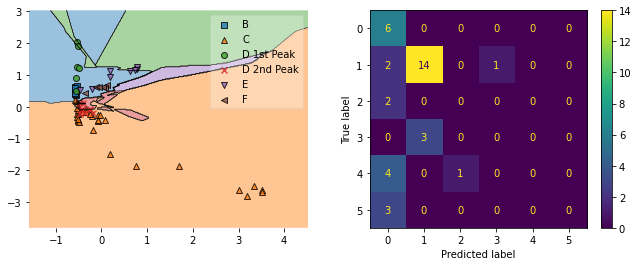

In [ ]:
from mlxtend.plotting import plot_decision_regions
fig, axes = plt.subplots(1, 2, figsize=(11, 4))

fig1 = plot_decision_regions(X=X, y=y, clf=knn, ax=axes[0], legend=1)
fig2 = plot_confusion_matrix(knn, X_test, y_test,  ax = axes[1])

handles, labels = fig1.get_legend_handles_labels()
fig1.legend(handles, le.inverse_transform(np.unique(y)), framealpha=0.3, scatterpoints=1)

## Optimize k Value and distance calculation

C:\Users\berka\miniconda3\envs\ml1\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.7222222222222222


C:\Users\berka\miniconda3\envs\ml1\lib\site-packages\mlxtend\plotting\decision_regions.py:280: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs)


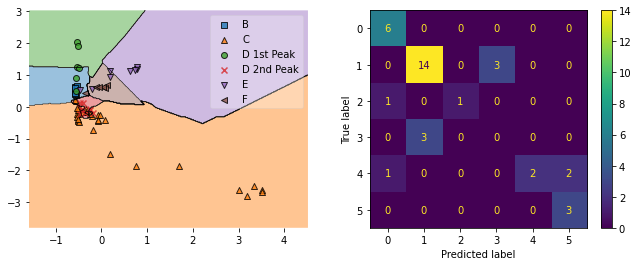

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 25),
    "weights": ["uniform", "distance"]}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)
print(gridsearch.best_params_)
test_preds_grid = gridsearch.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, test_preds_grid))

fig, axes2 = plt.subplots(1, 2, figsize=(11, 4))

## use X or X_train for plot decision regions
## use X or X_test for confusion mat
fig3 = plot_decision_regions(X=X, y=y, clf=gridsearch, ax=axes2[0], legend=1)
fig4 = plot_confusion_matrix(gridsearch, X_test, y_test, ax = axes2[1])

handles, labels = fig1.get_legend_handles_labels()
fig3.legend(handles, le.inverse_transform(np.unique(y)), framealpha=0.3, scatterpoints=1)

## Manual Visualization if needed

In [ ]:
## Visualization
# from matplotlib.colors import ListedColormap
# cm = plt.cm.RdBu
# cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# ax = plt.subplot()  

# ax.set_title("Input data")

# # This block of code returns the number of points in each class
# # which can be used for a scatter plot
# classes = np.zeros((max(y),), dtype=int)
# for i in range(max(y)):
#     for j in range(len(y)):
#         if y[j] == i:
#             classes[i]+=1
#         else:
#             continue
# print(classes)


# start_vals = np.zeros((len(classes)), dtype=int)
# for i in range(len(classes)):
#     start_vals[i] = start_vals[i-1] + classes[i]
# print(start_vals) 

# # Plot the training points
# #ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
# for i in range(max(y)):
#     if i!=5:
#         ax.scatter(X[start_vals[i]:(start_vals[i+1]-1), 0], X[start_vals[i]:(start_vals[i+1]-1), 1], 
#             cmap=cm_bright)
#     else: 
#         ax.scatter(X[start_vals[i]:, 0], X[start_vals[i]:, 0])

# ax.set_xticks(())
# ax.set_yticks(())
# plt.tight_layout()
# ax.set_xlabel('SET Width (s)')
# ax.set_ylabel('SET Magnitude (V)')
# ax.set_title('scatter plot')
# ax.legend(le.inverse_transform(pd.unique(df['Class'])))
# plt.show()

## Plot Example

In [ ]:
# Fixing random state for reproducibility
# np.random.seed(19680801)


# def randrange(n, vmin, vmax):
#     """
#     Helper function to make an array of random numbers having shape (n, )
#     with each number distributed Uniform(vmin, vmax).
#     """
#     return (vmax - vmin)*np.random.rand(n) + vmin

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# n = 100

# # For each set of style and range settings, plot n random points in the box
# # defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
#     xs = randrange(n, 23, 32)
#     ys = randrange(n, 0, 100)
#     zs = randrange(n, zlow, zhigh)
#     ax.scatter(xs, ys, zs, marker=m)
#     #ax.scatter(xs, ys, marker=m)

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.show()